In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path

%matplotlib inline

## Visualization wrt different t

In [2]:
def plot_property(prob, directed, n, res, t, prop):
    # check the directed value
    if directed:
        lab = 'dir'
    else : lab = 'und'
    # check the type
    if t:
        thr = 'maxpred'
    else : thr = 'pred'
    # check property code
    if prop == 1:
        color = 'royalblue'
        mask = lambda x: (x.max_level <= 1) & (x.avg_level < 0)
    if prop == 0:
        color = 'darkorange'
        mask = lambda x: (x.max_level == 0)
    
    
    fig, axs = plt.subplots(len(res), 1, figsize = (8,12))
    for i, t in enumerate(res):
        data = {}
        for p in prob:
            if not path.exists('data/{}/data_{}_{}_{}.csv'.format(thr, lab, n, p)):
                    continue
            # load data
            temp = pd.read_csv('data/{}/data_{}_{}_{}.csv'.format(thr, lab, n, p), index_col=0)
            # on each realization check for which nodes the property is realized
            temp2 = temp[temp.resistance == t].groupby('realization').apply(mask)
            data[p] = (pd.DataFrame(temp2).groupby('realization').sum() > 0).mean()
            del temp, temp2
        
        # plot data
        axs[i].set_title('Phase transition for t = {}'.format(t), fontsize=15)
        _ = axs[i].plot(list(data.keys()), list(data.values()), 'o-', color=color)
        _ = axs[i].set_xlim(xmax=0.2)
        _ = axs[i].set_xlabel('probability')

        # delete from memory
        del data

    #plt.suptitle('Phase transition for maxlevel < 1, n = {}, {}'.format(n, lab), y=1.02, fontsize=20)
    plt.tight_layout()
    plt.savefig('images/p{}_{}_{}_{}.jpeg'.format(prop, thr, lab, n))

Used probabilities: [0.0001, 0.0005, 0.002969251759660712, 0.004938503519321424, 0.009, 0.01, 0.01399999999999997, 0.018499999999999975, 0.02299999999999998, 0.027499999999999983, 0.03199999999999999, 0.03649999999999999, 0.040999999999999995, 0.0455, 0.05, 0.1, 0.6, 0.7, 0.8]
Used probabilities: [2e-05, 0.0001, 0.0007011462127610826, 0.001202292425522165, 0.005, 0.01, 0.01399999999999997, 0.018499999999999975, 0.02299999999999998, 0.027499999999999983, 0.03199999999999999, 0.03649999999999999, 0.040999999999999995, 0.0455, 0.05, 0.1, 0.6, 0.7, 0.8]
Used probabilities: [1e-05, 5e-05, 0.00037367801239920613, 0.0006473560247984122, 0.005, 0.01, 0.01399999999999997, 0.018499999999999975, 0.02299999999999998, 0.027499999999999983, 0.03199999999999999, 0.03649999999999999, 0.040999999999999995, 0.0455, 0.05, 0.1, 0.6, 0.7, 0.8]


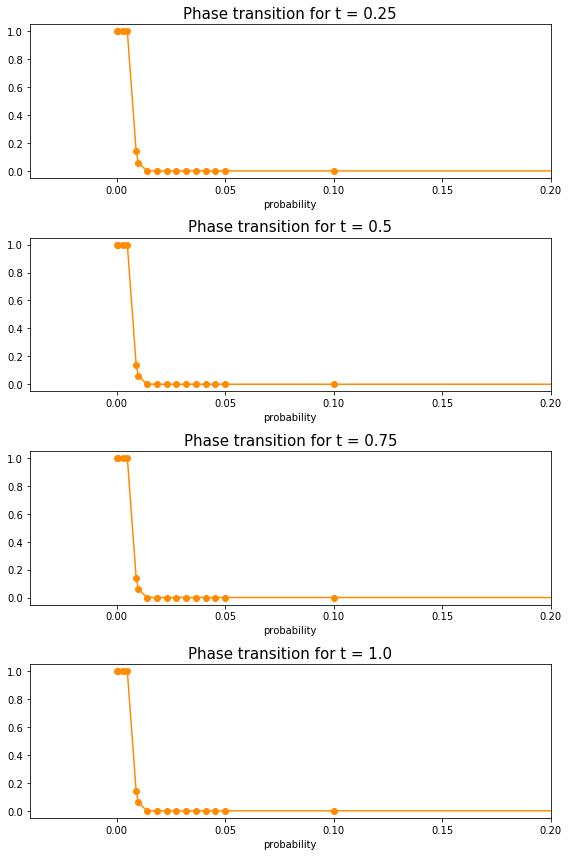

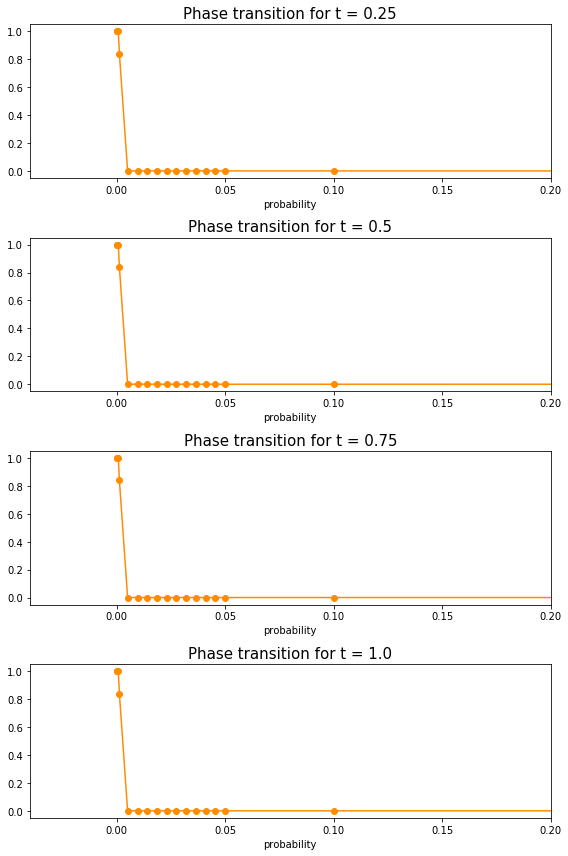

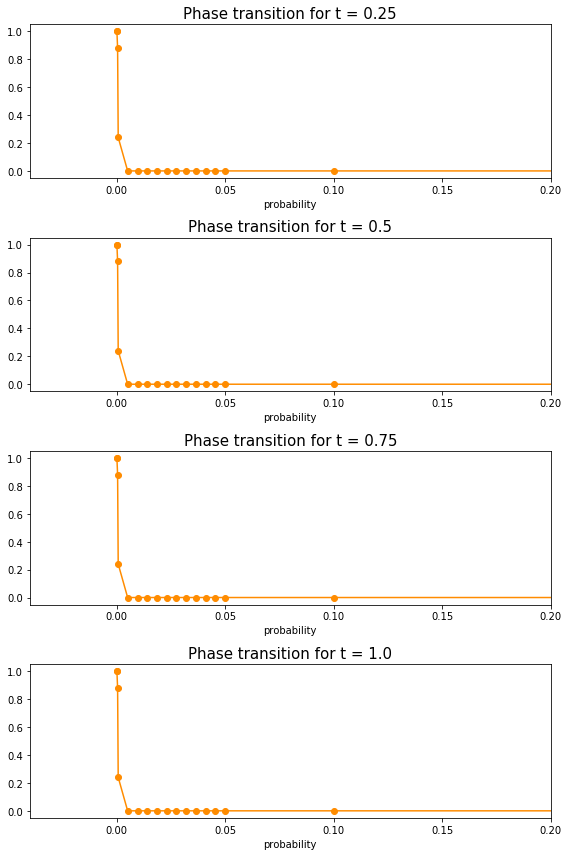

In [6]:
# directed
d = False
# type: {True : maxpred, False: pred}
t = False
# property code (0 or 1)
p = 0

for N in [1000, 5000, 10000]:
    # reading probabilities
    with open('data/keys{}.txt'.format(N), 'r') as f:
        prob = eval(f.read())
    with open('data/keys_ref.txt', 'r') as f:
        prob2 = eval(f.read())
    prob.extend(prob2)
    prob.sort()
    print('Used probabilities:', prob)
    # reading resistances
    res = np.load('data/res_phase1.npy')

    # show data on nodes per resistance value, for each gnp (mean on sample)
    plot_property(prob, d, N, res, t, p)

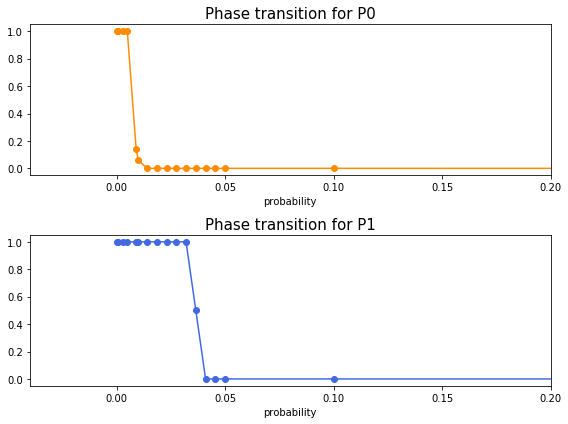

In [8]:
t = 0.5

n = 1000

tipo = True

directed = False


# check the directed value
if directed:
    lab = 'dir'
else : lab = 'und'
# check the type
if tipo:
    thr = 'maxpred'
else : thr = 'pred'
mask = []
mask.append(lambda x: (x.max_level == 0))
mask.append(lambda x: (x.max_level <= 1) & (x.avg_level < 0))


fig, axs = plt.subplots(2, 1, figsize = (8,6))

# reading probabilities
with open('data/keys{}.txt'.format(n), 'r') as f:
    prob = eval(f.read())
with open('data/keys_ref.txt', 'r') as f:
    prob2 = eval(f.read())
prob.extend(prob2)
prob.sort()
data1, data2 = {}, {}
for p in prob:
    if not path.exists('data/{}/data_{}_{}_{}.csv'.format(thr, lab, n, p)):
            continue
    # load data
    temp = pd.read_csv('data/{}/data_{}_{}_{}.csv'.format(thr, lab, n, p), index_col=0)
    # on each realization check for which nodes the property is realized
    temp2 = temp[temp.resistance == t].groupby('realization').apply(mask[0])
    data1[p] = (pd.DataFrame(temp2).groupby('realization').sum() > 0).mean()
    del temp2
    temp3 = temp[temp.resistance == t].groupby('realization').apply(mask[1])
    data2[p] = (pd.DataFrame(temp3).groupby('realization').sum() > 0).mean()
    del temp, temp3

# plot data
axs[0].set_title('Phase transition for P0'.format(t), fontsize=15)
_ = axs[0].plot(list(data1.keys()), list(data1.values()), '-o', color = 'darkorange')
_ = axs[0].set_xlim(xmax=0.2)
_ = axs[0].set_xlabel('probability')
# plot data
axs[1].set_title('Phase transition for P1'.format(t), fontsize=15)
_ = axs[1].plot(list(data2.keys()), list(data2.values()), '-o', color= 'royalblue')
_ = axs[1].set_xlim(xmax=0.2)
_ = axs[1].set_xlabel('probability')

plt.tight_layout()
plt.savefig('images/property_phases_{}_{}_{}.jpeg'.format(thr, lab, n))

# delete from memory
del data1, data2

## Visualizations of the approximed phase transition threshold

In [9]:
def plot_threshold(directed, sizes, res, t, side = 'left'):
    # check the directed value
    if directed:
        lab = 'dir'
    else : lab = 'und'
    # check the t type
    if t:
        thr = 'maxpred'
    else : thr = 'pred'
    # check side
    if side == 'left':
        plot_type = 'idmax1'
    if side == 'right':
        plot_type = 'idmin0'
    
    
    fig, axs = plt.subplots(len(res), 2, figsize = (10,12))
    for i, t in enumerate(res):
        data_0, data_1 = [], []
        for n in sizes:
            # reading probabilities
            with open('data/keys{}.txt'.format(n), 'r') as f:
                prob = eval(f.read())
            with open('data/keys_ref.txt'.format(n), 'r') as f:
                prob2 = eval(f.read())
            prob.extend(prob2)
            prob.sort()
            
            temp3_0,  temp3_1 = {}, {}
            for p in prob:
                if not path.exists('data/{}/data_{}_{}_{}.csv'.format(thr, lab, n, p)):
                    continue
                # load data
                temp = pd.read_csv('data/{}/data_{}_{}_{}.csv'.format(thr, lab, n, p), index_col=0)
                # on each realization check for which nodes the property is realized
                temp2_0 = temp[temp.resistance == t].groupby('realization').apply(lambda x: x.max_level == 0)
                temp2_1 = temp[temp.resistance == t].groupby('realization').apply(lambda x: (x.max_level <= 1) & (x.avg_level < 0))
                temp3_0[p] = ((pd.DataFrame(temp2_0).groupby('realization').sum() > 0).mean()).values.item()
                temp3_1[p] = ((pd.DataFrame(temp2_1).groupby('realization').sum() > 0).mean()).values.item()
                del temp, temp2_0, temp2_1
            if side == 'left':
                data_0.append(pd.Series(temp3_0).idxmax(1))
                data_1.append(pd.Series(temp3_1).idxmax(1))
            if side == 'right':                
                data_0.append(pd.Series(temp3_0).idxmin(0))
                data_1.append(pd.Series(temp3_1).idxmin(0))
            del temp3_0, temp3_1
        
        # plot data
        axs[i, 0].set_title('Phase transition of P0 for t = {}'.format(t), fontsize=15)
        _ = axs[i, 0].plot(sizes, data_0, 'o-', color='darkorange')
        _ = axs[i, 0].set_xlabel('sizes')
        _ = axs[i, 0].set_ylabel('probability threshold')
        axs[i, 1].set_title('Phase transition of P1 for t = {}'.format(t), fontsize=15)    
        _ = axs[i, 1].plot(sizes, data_1, 'o-', color='royalblue')
        _ = axs[i, 1].set_xlabel('sizes')
        _ = axs[i, 1].set_ylabel('probability threshold')
        
        # save data
        np.save('data/{}/p0-phase-trans-{}_{}.npy'.format(thr,t,plot_type), data_0)
        np.save('data/{}/p1-phase-trans-{}_{}.npy'.format(thr,t,plot_type), data_1)
        del data_0, data_1
        
    #plt.suptitle('Phase transition for maxlevel < 1, n = {}, {}'.format(n, lab), y=1.02, fontsize=20)
    plt.tight_layout()
    plt.savefig('images/phase_thr_{}_{}_{}.jpeg'.format(thr, lab, plot_type))

In [10]:
# directed
d = False
# type: {True : maxpred, False: pred}
t = True

# reading resistances
res = np.load('data/res_phase1.npy')

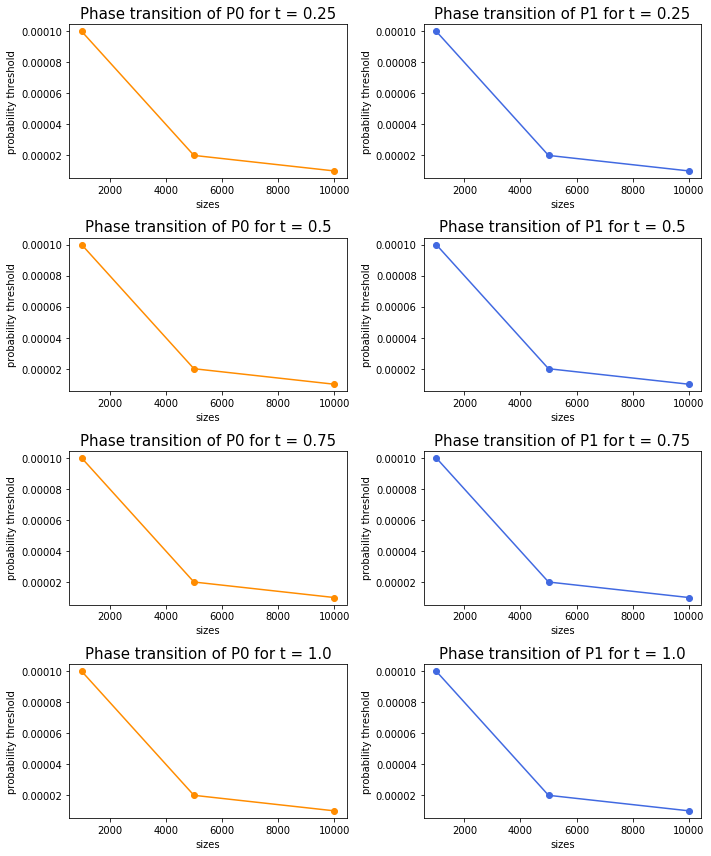

In [12]:
plot_threshold(d, [1000, 5000, 10000], res, t, 'left')

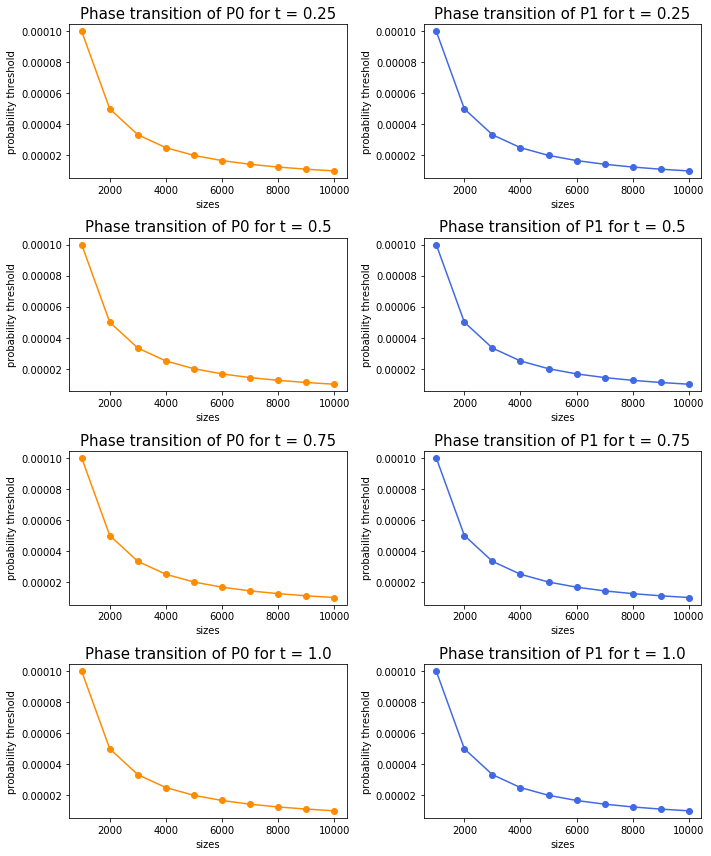

In [12]:
plot_threshold(d, list(range(10**3, 10**4 + 10**3, 10**3)), res, t, 'left')

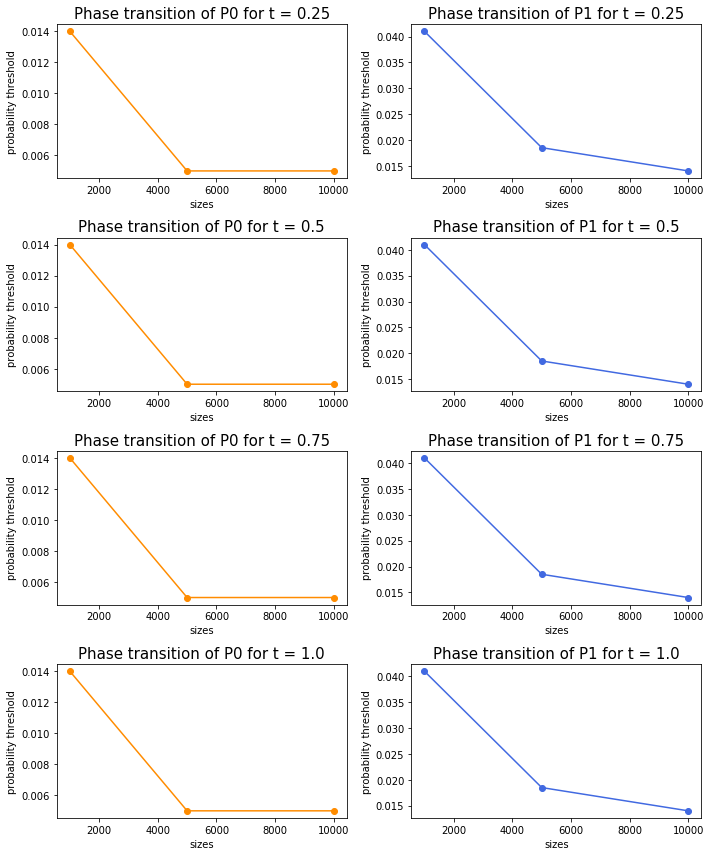

In [14]:
plot_threshold(d, [1000, 5000, 10000], res, t, 'right')

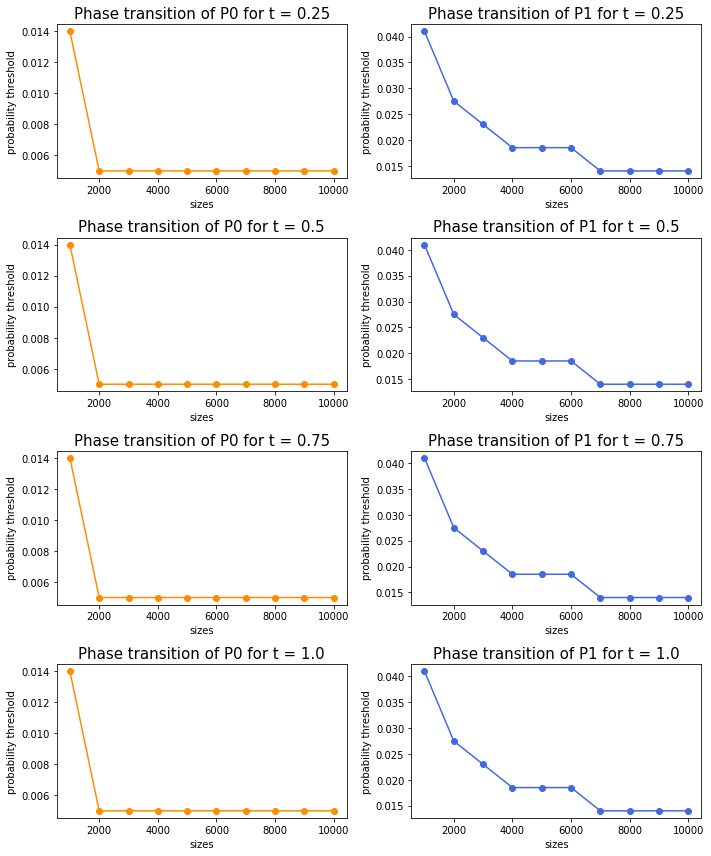

In [13]:
plot_threshold(d, list(range(10**3, 10**4 + 10**3, 10**3)), res, t, 'right')

## Comparison among functions and the approx threshold

In [14]:
lab = 'und'
thr = 'maxpred'

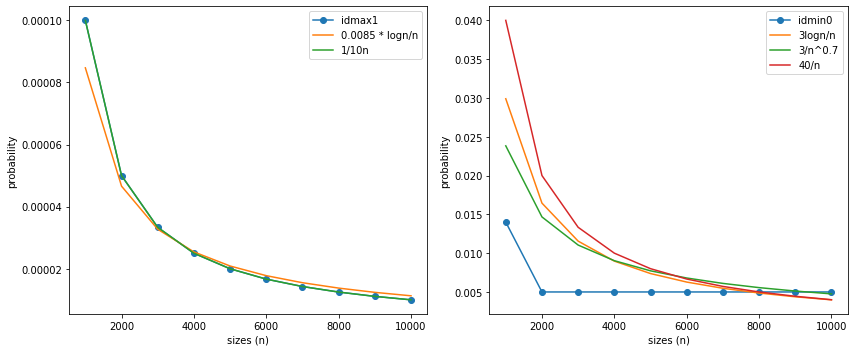

In [15]:
fig, axs = plt.subplots(1, 2, figsize = (12,5))

sizes = np.arange(10**3, 10**4 + 10**3, 10**3)

data = np.load('data/maxpred/p0-phase-trans-0.5_idmax1.npy')
c = 0.0085
axs[0].plot(sizes, data, '-o')
axs[0].plot(sizes, c * np.log2(sizes)/sizes)
axs[0].plot(sizes, 0.1/sizes)
axs[0].legend(['idmax1', '0.0085 * logn/n','1/10n'])
axs[0].set_xlabel('sizes (n)')
axs[0].set_ylabel('probability')

data = np.load('data/maxpred/p0-phase-trans-0.5_idmin0.npy')
c1 = 3
c2 = 3
c3 = 40
axs[1].plot(sizes, data, '-o')
axs[1].plot(sizes, c1 * np.log2(sizes)/sizes)
axs[1].plot(sizes, c2 * 1/sizes**0.7)
axs[1].plot(sizes, c3 * 1/sizes)
axs[1].legend(['idmin0', '{}logn/n'.format(c1), '{}/n^0.7'.format(c2), '{}/n'.format(c3)])
axs[1].set_xlabel('sizes (n)')
axs[1].set_ylabel('probability')

plt.tight_layout()
plt.savefig('images/p0_threshold_{}_{}.jpeg'.format(thr, lab))
plt.show()

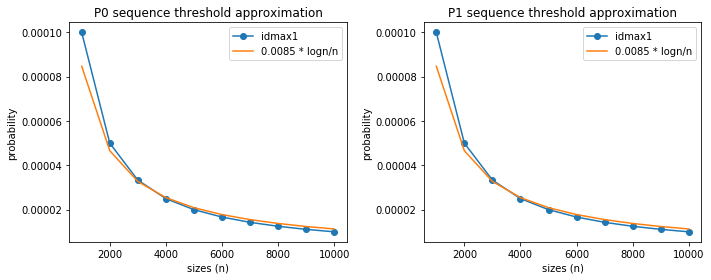

In [16]:
fig, axs = plt.subplots(1, 2, figsize = (10,4))

sizes = np.arange(10**3, 10**4 + 10**3, 10**3)

data = np.load('data/maxpred/p0-phase-trans-0.5_idmax1.npy')
c = 0.0085
axs[0].plot(sizes, data, '-o')
axs[0].plot(sizes, c * np.log2(sizes)/sizes)
axs[0].legend(['idmax1', '0.0085 * logn/n'])
axs[0].set_xlabel('sizes (n)')
axs[0].set_ylabel('probability')
axs[0].set_title('P0 sequence threshold approximation')


data = np.load('data/maxpred/p1-phase-trans-0.5_idmax1.npy')
c = 0.0085
axs[1].plot(sizes, data, '-o')
axs[1].plot(sizes, c * np.log2(sizes)/sizes)
axs[1].legend(['idmax1', '0.0085 * logn/n'])
axs[1].set_xlabel('sizes (n)')
axs[1].set_ylabel('probability')
axs[1].set_title('P1 sequence threshold approximation')


#data = np.load('data/maxpred/p1-phase-trans-0.5_idmin0.npy')
#c1 = 5
#c2 = 8
#c3 = 100
#axs[1].plot(sizes, data, '-o')
#axs[1].plot(sizes, c1 * np.log2(sizes)/sizes)
#axs[1].plot(sizes, c2 * np.log2(sizes)/sizes)
#axs[1].plot(sizes, c3 * 1/sizes)
#axs[1].legend(['idmin0', '{}logn/n'.format(c1), '{}logn/n'.format(c2), '{}/n'.format(c3)])
#axs[1].set_xlabel('sizes (n)')
#axs[1].set_ylabel('probability')

plt.tight_layout()
plt.savefig('images/threshold_{}_{}.jpeg'.format(thr, lab))
plt.show()

# New property only for pred threshold

In [93]:
def plot_pred_property(prob, directed, n, res, t = False, prop = 0, sample_size = 1000):
    
    
    # check the directed value
    if directed:
        lab = 'dir'
    else : lab = 'und'
    # check the type
    if t:
        thr = 'maxpred'
    else : thr = 'pred'
    # check property code
    if prop == 1:
        color = 'crimson'
        mask = lambda x: (x.avg_level > 0)
    if prop == 0:
        color = 'darkorange'
        mask = lambda x: (x.max_level == 0)
    
    
    fig, axs = plt.subplots(len(res), 1, figsize = (8,12))
    for i, t in enumerate(res):
        data = {}
        for p in prob:
            if not path.exists('data/{}/data_{}_{}_{}.csv'.format(thr, lab, n, p)):
                    continue
            # load data
            temp = pd.read_csv('data/{}/data_{}_{}_{}.csv'.format(thr, lab, n, p), index_col=0)
            # on each realization check for which nodes the property is realized
            temp2 = temp[temp.resistance == t].groupby('realization').apply(mask)
            data[p] = (pd.DataFrame(temp2).groupby('realization').sum() > 0).mean() 
            del temp, temp2
        
        # plot data
        axs[i].set_title('Phase transition for t = {}'.format(t), fontsize=15)
        _ = axs[i].plot(list(data.keys()), list(data.values()), 'o-', color=color)
        #_ = axs[i].set_xlim(xmax=0.2)
        _ = axs[i].set_xlabel('probability')

        # delete from memory
        del data

    #plt.suptitle('Phase transition for maxlevel < 1, n = {}, {}'.format(n, lab), y=1.02, fontsize=20)
    plt.tight_layout()
    #plt.savefig('images/p{}_{}_{}_{}.jpeg'.format(prop+2, thr, lab, n))

Used probabilities: [0.0001, 0.0005, 0.002969251759660712, 0.004938503519321424, 0.009, 0.01, 0.01399999999999997, 0.018499999999999975, 0.02299999999999998, 0.027499999999999983, 0.03199999999999999, 0.03649999999999999, 0.040999999999999995, 0.0455, 0.05, 0.1, 0.6, 0.7, 0.8]
Used probabilities: [2e-05, 0.0001, 0.0007011462127610826, 0.001202292425522165, 0.005, 0.01, 0.01399999999999997, 0.018499999999999975, 0.02299999999999998, 0.027499999999999983, 0.03199999999999999, 0.03649999999999999, 0.040999999999999995, 0.0455, 0.05, 0.1, 0.6, 0.7, 0.8]
Used probabilities: [1e-05, 5e-05, 0.00037367801239920613, 0.0006473560247984122, 0.005, 0.01, 0.01399999999999997, 0.018499999999999975, 0.02299999999999998, 0.027499999999999983, 0.03199999999999999, 0.03649999999999999, 0.040999999999999995, 0.0455, 0.05, 0.1, 0.6, 0.7, 0.8]


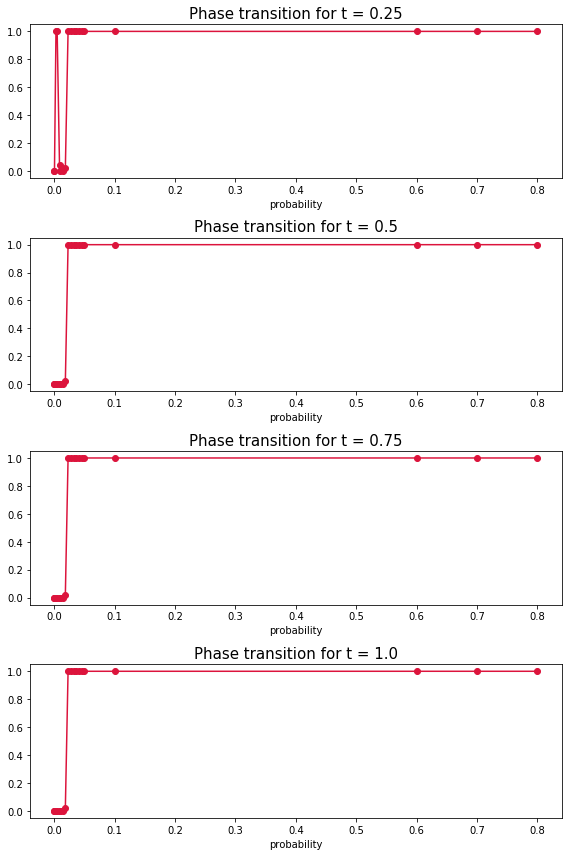

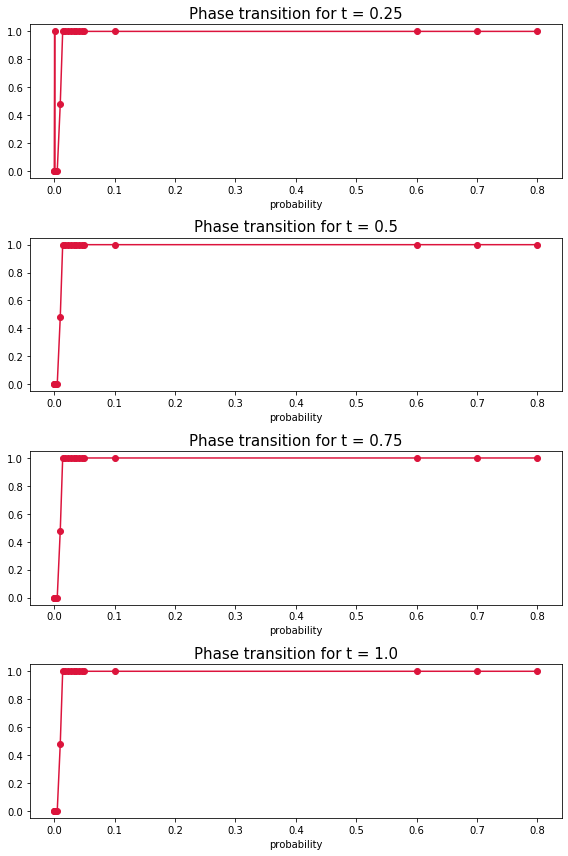

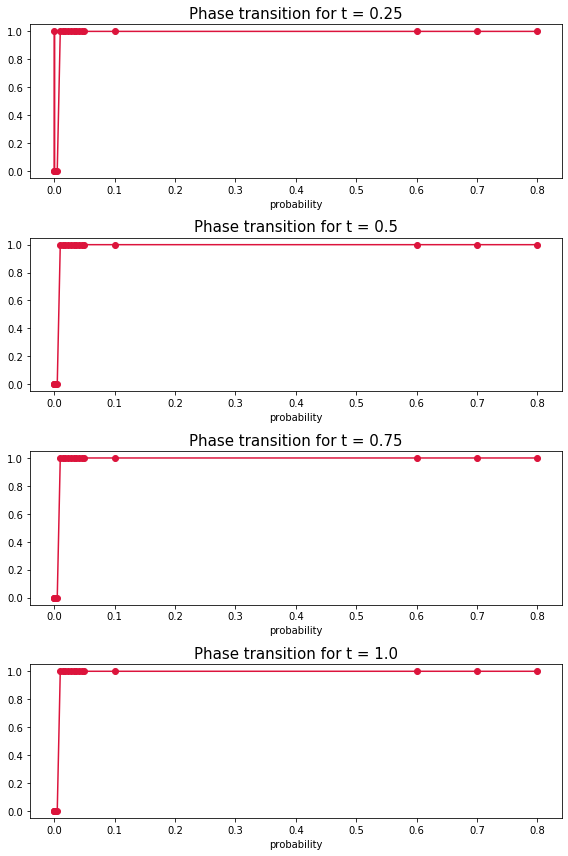

In [94]:
# directed
d = True
# type: {True : maxpred, False: pred}
t = False 
# property code (0 or 1)
p = 1

sample_size = {1000 : 1000, 5000 : 1000, 10000: 100}

for N in [1000, 5000, 10000]:
    # reading probabilities
    with open('data/keys{}.txt'.format(N), 'r') as f:
        prob = eval(f.read())
    with open('data/keys_ref.txt', 'r') as f:
        prob2 = eval(f.read())
    prob.extend(prob2)
    prob.sort()
    print('Used probabilities:', prob)
    # reading resistances
    res = np.load('data/res_phase1.npy')

    # show data on nodes per resistance value, for each gnp (mean on sample)
    plot_pred_property(prob, d, N, res, t, p, sample_size[N])